# Yahia Kamel Hussein

## What countries have offered their citizens the best living standards  between 2015-2021, as observed by happiness score, social support, economy, freedom, and government corruption

Based on 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#Understanding my variables
import seaborn as sns

df = pd.read_csv("world_happiness_report.csv")
print(df)

      Unnamed: 0  Happiness Rank      Country  \
0              0               1  Switzerland   
1              1               2      Iceland   
2              2               3      Denmark   
3              3               4       Norway   
4              4               5       Canada   
...          ...             ...          ...   
1224         141             142    Botswana*   
1225         142             143      Rwanda*   
1226         143             144     Zimbabwe   
1227         144             145      Lebanon   
1228         145             146  Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   
1224        

In [ ]:
#Understanding my Happiness Dataset

print("First Five Rows and Columns: ",df.shape)
print("Head: ", df.head())
print("Columns: ", df.columns)

#df1.nunique(axis=0)
#df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))



First Five Rows and Columns:  (1229, 12)
Head:     Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freed

In [ ]:
#preview dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB


In [ ]:
unique_values = df.nunique(axis=0)
print(unique_values)

'''This output shows that the survey includes data for all countries (158 unique values under 'Countries') in the international area over a span of 8 years'''

Unnamed: 0                        158
Happiness Rank                    158
Country                           195
Region                             17
Happiness Score                  1131
Economy (GDP per Capita)         1150
Family (Social Support)          1133
Health (Life Expectancy)         1080
Freedom                          1053
Trust (Government Corruption)     952
Generosity                        979
Year                                8
dtype: int64


"This output shows that the survey includes data for all countries (158 unique values under 'Countries') in the international area over a span of 8 years"

In [ ]:
print("Countries: ", df['Country'].unique())

print("Regions: ", df['Region'].unique())


''' To show which countries and regions are being analyzed. This showcases that there are some countries that are assigned a '*', and some regions are null: '-'
'''


Countries:  ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latv

" To show which countries and regions are being analyzed. This showcases that there are some countries that are assigned a '*', and some regions are null: '-'\n"

In [ ]:
#Dropping rows with null values

df_cleaned = df[df.Region != '-']
print(df_cleaned)

'''To delete all instances where region is null'''

      Unnamed: 0  Happiness Rank       Country  \
0              0               1   Switzerland   
1              1               2       Iceland   
2              2               3       Denmark   
3              3               4        Norway   
4              4               5        Canada   
...          ...             ...           ...   
1221         138             139      Tanzania   
1222         139             140  Sierra Leone   
1226         143             144      Zimbabwe   
1227         144             145       Lebanon   
1228         145             146   Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   


'To delete all instances where region is null'

In [ ]:
print(df['Year'].unique())

'''This analysis showcases the timespan for which we can analyze trends'''

[2015 2016 2017 2018 2019 2020 2021 2022]


'This analysis showcases the timespan for which we can analyze trends'

In [ ]:
check_null_values = df.isnull().values.any()
print(check_null_values)

''' To ensure there are no null values in our dataset to be cleaned'''

False


' To ensure there are no null values in our dataset to be cleaned'

In [ ]:
df_cleaned_2= df_cleaned.drop(df_cleaned.columns[0], axis=1)
print(df_cleaned_2.shape)

'''To drop Unnamed column and ensure the column has been deleted'''

(1183, 11)


'To drop Unnamed column and ensure the column has been deleted'

In [ ]:
df_cleaned_3 = df_cleaned_2[df_cleaned_2.Year != 2022]
print(df_cleaned_3)
#df_cleaned_3.describe()

      Happiness Rank      Country              Region Happiness Score  \
0                  1  Switzerland      Western Europe           7.587   
1                  2      Iceland      Western Europe           7.561   
2                  3      Denmark      Western Europe           7.527   
3                  4       Norway      Western Europe           7.522   
4                  5       Canada       North America           7.427   
...              ...          ...                 ...             ...   
1078             145      Lesotho  Sub-Saharan Africa           3.512   
1079             146     Botswana  Sub-Saharan Africa           3.467   
1080             147       Rwanda  Sub-Saharan Africa           3.415   
1081             148     Zimbabwe  Sub-Saharan Africa           3.145   
1082             149  Afghanistan          South Asia           2.523   

     Economy (GDP per Capita) Family (Social Support)  \
0                     1.39651                 1.34951   
1        

In [ ]:

#region_drop = df_cleaned_3.columns.drop('Region')
#country_drop = df_cleaned_3.columns.drop('Country')
#df_cleaned_3[region_drop] = df_cleaned_3[region_drop].apply(pd.to_numeric, errors='coerce')
#df_cleaned_3[country_drop] = df_cleaned_3[country_drop].apply(pd.to_numeric, errors='coerce')
#df_cleaned_3.info()
df_cleaned_3["Happiness Score"]=df_cleaned_3["Happiness Score"].astype(float)
df_cleaned_3["Economy (GDP per Capita)"]=df_cleaned_3["Economy (GDP per Capita)"].astype(float)
df_cleaned_3["Family (Social Support)"]=df_cleaned_3["Family (Social Support)"].astype(float)
df_cleaned_3["Health (Life Expectancy)"]=df_cleaned_3["Health (Life Expectancy)"].astype(float)
df_cleaned_3["Freedom"]=df_cleaned_3["Freedom"].astype(float)
df_cleaned_3["Trust (Government Corruption)"]=df_cleaned_3["Trust (Government Corruption)"].astype(float)


#df_cleaned_4 = df_cleaned_3.loc[:, ~df_cleaned_3.columns.isin(['Region', 'Country'])].apply(pd.to_numeric, errors = 'coerce')


C:\Users\Dell\AppData\Local\Temp\ipykernel_1532\3880534377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_3["Happiness Score"]=df_cleaned_3["Happiness Score"].astype(float)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1532\3880534377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_3["Economy (GDP per Capita)"]=df_cleaned_3["Economy (GDP per Capita)"].astype(float)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1532\3880534377.py:8: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
df_cleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1082
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 1064 non-null   int64  
 1   Country                        1064 non-null   object 
 2   Region                         1064 non-null   object 
 3   Happiness Score                1064 non-null   float64
 4   Economy (GDP per Capita)       1064 non-null   float64
 5   Family (Social Support)        1064 non-null   float64
 6   Health (Life Expectancy)       1064 non-null   float64
 7   Freedom                        1064 non-null   float64
 8   Trust (Government Corruption)  1064 non-null   float64
 9   Generosity                     1064 non-null   object 
 10  Year                           1064 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 99.8+ KB


In [ ]:
dropped_df = df_cleaned_3.drop(['Year', 'Generosity', 'Happiness Rank'], axis=1)
''' I have dropped Year and Generosity columns as I am not going to need it for my analysis'''

' I have dropped Year and Generosity columns as I am not going to need it for my analysis'

In [ ]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1082
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1064 non-null   object 
 1   Region                         1064 non-null   object 
 2   Happiness Score                1064 non-null   float64
 3   Economy (GDP per Capita)       1064 non-null   float64
 4   Family (Social Support)        1064 non-null   float64
 5   Health (Life Expectancy)       1064 non-null   float64
 6   Freedom                        1064 non-null   float64
 7   Trust (Government Corruption)  1064 non-null   float64
dtypes: float64(6), object(2)
memory usage: 107.1+ KB


In [ ]:
dropped_df.describe()

,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption)
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,5.418920,0.919224,1.050222,0.613049,0.430625,0.127485
std,1.119277,0.399295,0.332545,0.247509,0.152321,0.108336
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.571000,0.618450,0.840197,0.439750,0.329094,0.055000
50%,5.387500,0.983096,1.081475,0.644974,0.448440,0.092850
75%,6.224075,1.241105,1.311449,0.800467,0.552335,0.160568
max,7.842000,1.870766,1.644000,1.141000,0.724000,0.551910


In [ ]:
#ordered = dropped_df.groupby("Region")["Happiness Score"].mean().sort_values(ascending = False)
#sns.barplot(x = "Region", y = "Happiness Score", data = dropped_df, order = ordered.index)
#plt.xticks(rotation = 90)
#plt.show()
#ordered1 = dropped_df.groupby("Region")["Economy (GDP per Capita)"].mean().sort_values(ascending = False)
#sns.barplot(x = "Region", y = "Economy (GDP per Capita)", data = dropped_df, order = ordered1.index)
#plt.xticks(rotation = 90)
#plt.show()
#ordered2 = dropped_df.groupby("Region")["Family (Social Support)"].mean().sort_values(ascending = False)
#sns.barplot(x = "Region", y = "Family (Social Support)", data = dropped_df, order = ordered2.index)
#plt.xticks(rotation = 90)
#plt.show()

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
sliced_df = dropped_df.iloc[:, 2:]
#print(sliced_df)
normalized_df = normalize(sliced_df)
normalized_df["Country"] = dropped_df["Country"]
normalized_df["Region"] = dropped_df["Region"]
print(normalized_df)
'''Normalizing my dataset on each column to be between 0 and 1 (0 being the lowest and 1 being the highest), so I can further continue my analysis'''

      Happiness Score  Economy (GDP per Capita)  Family (Social Support)  \
0            0.952059                  0.746491                 0.820870   
1            0.947171                  0.696143                 0.852938   
2            0.940778                  0.708523                 0.827603   
3            0.939838                  0.779895                 0.809580   
4            0.921978                  0.708956                 0.804507   
...               ...                       ...                      ...   
1078         0.185937                  0.241078                 0.444647   
1079         0.177477                  0.587460                 0.440389   
1080         0.167701                  0.194573                 0.122871   
1081         0.116939                  0.244285                 0.394769   
1082         0.000000                  0.197780                 0.000000   

      Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0           

'Normalizing my dataset on each column to be between 0 and 1 (0 being the lowest and 1 being the highest), so I can further continue my analysis'

In [ ]:
ordered_by_country = normalized_df.groupby(['Country'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',
                                           'Family (Social Support)', 'Health (Life Expectancy)', 
                                           'Freedom', 'Trust (Government Corruption)'].mean()

#"Country")[ "Happiness Score", "Economy (GDP per Capita)",
#                                            "Family (Social Support)", "Health (Life Expectancy)", 
#                                            "Freedom", "Trust (Government Corruption)"].mean().sort_values(by = ['Happiness Score'], ascending = False)
# sliced_ordered = ordered.iloc[:, 2:]
# ordered.drop(['Country'], axis = 1)
# ordered = ordered[:10]
ordered_by_country['Total Sum of Columns']=ordered_by_country.iloc[:,1:7].sum(axis=1)
ordered_by_sum_country = ordered_by_country.sort_values(by = ['Total Sum of Columns'], ascending = False)
ordered_by_sum_country = ordered_by_sum_country[140:]
print(ordered_by_sum_country)

'''Grouping the dataframe based on the country, and taking the mean for all columns over all the years between 2015-2021.Then I am looping over the ordered by country dataframe and summing up all the columns for every specific country and sorting them by the "Total Sum of Columns" to therefore use that for visualizations'''

                      Country  Happiness Score  Economy (GDP per Capita)  \
167                    Gambia         0.447039                  0.166774   
132                  Cameroon         0.430932                  0.278170   
140                    Uganda         0.309081                  0.173342   
123                Mauritania         0.341514                  0.309203   
150               Ivory Coast         0.382572                  0.300836   
137                      Mali         0.346099                  0.194290   
151              Burkina Faso         0.330639                  0.171035   
143                     Niger         0.345006                  0.068983   
96                    Lesotho         0.261415                  0.246192   
114                  Zimbabwe         0.236785                  0.198759   
117                     Sudan         0.323134                  0.322899   
135                     Yemen         0.205554                  0.241938   
149         

C:\Users\Dell\AppData\Local\Temp\ipykernel_1532\1617179540.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ordered_by_country = normalized_df.groupby(['Country'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',


'Grouping the dataframe based on the country, and taking the mean for all columns over all the years between 2015-2021.Then I am looping over the ordered by country dataframe and summing up all the columns for every specific country and sorting them by the "Total Sum of Columns" to therefore use that for visualizations'

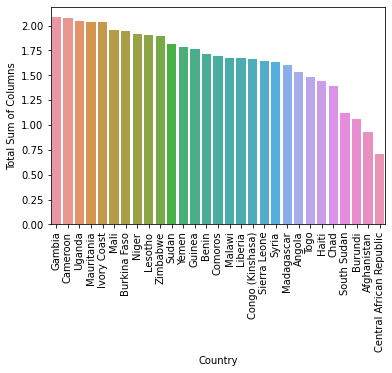

'Bar Plot for the best living standards based on country'

In [ ]:
sns.barplot(x = "Country", y = "Total Sum of Columns", data=ordered_by_sum_country)
plt.xticks(rotation = 90)
plt.show()

'''Bar Plot for the best living standards based on country'''

In [ ]:
ordered_by_region = normalized_df.groupby(['Region'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',
                                           'Family (Social Support)', 'Health (Life Expectancy)', 
                                           'Freedom', 'Trust (Government Corruption)'].mean()
ordered_by_region['Total Sum of Columns']=ordered.iloc[:,1:7].sum(axis=1)
ordered_by_sum_region = ordered_by_region.sort_values(by = ['Total Sum of Columns'], ascending = False)

print(ordered_by_sum_region)
'''Grouping the dataframe based on the region, and taking the mean for all columns over all the years between 2015-2021. Then, I am looping over the ordered dataframe and summing up all the columns for every specific region and sorting them by the "Total Sum of Columns" to therefore use that for visualizations'''

                                Region  Happiness Score  \
2            Australia and New Zealand         0.897086   
0                       Western Europe         0.804495   
5                    Southeastern Asia         0.528714   
3      Middle East and Northern Africa         0.526243   
7                         Eastern Asia         0.584220   
8                   Sub-Saharan Africa         0.326204   
9                        Southern Asia         0.386850   
4          Latin America and Caribbean         0.653854   
6           Central and Eastern Europe         0.564470   
1                        North America         0.874544   
12                           East Asia         0.609060   
14  Commonwealth of Independent States         0.543273   
10               North America and ANZ         0.870091   
11        Middle East and North Africa         0.507701   
13                      Southeast Asia         0.540038   
15                          South Asia         0.363912 

C:\Users\Dell\AppData\Local\Temp\ipykernel_1532\1476725291.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ordered_by_region = normalized_df.groupby(['Region'], as_index = False, sort = False)['Happiness Score', 'Economy (GDP per Capita)',


'Grouping the dataframe based on the region, and taking the mean for all columns over all the years between 2015-2021. Then, I am looping over the ordered dataframe and summing up all the columns for every specific region and sorting them by the "Total Sum of Columns" to therefore use that for visualizations'

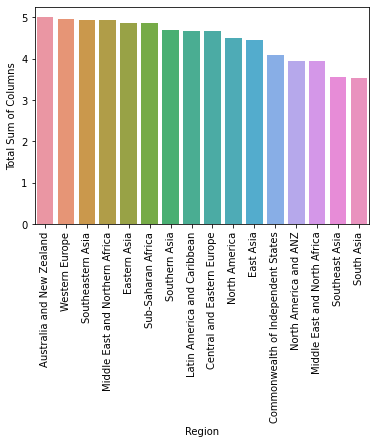

'Bar Plot for the best living standards based on region'

In [ ]:
sns.barplot(x = "Region", y = "Total Sum of Columns", data=ordered_by_sum_region)
plt.xticks(rotation = 90)
plt.show()
'''Bar Plot for the best living standards based on region'''

In [ ]:


'''Add an extra column for the rank based on the Total Sum of Columns'''

'Add an extra column for the rank based on the Total Sum of Columns'